In [1016]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

## Import the data

In [1017]:
df1 = pd.read_csv('dataset/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [1018]:
df1.shape

(13320, 9)

# Task 1: Data Cleaning

### Data Cleaning
## Sub-task 1: Clean the data

### Counting how many different 'area_type' we have

In [1019]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Dropping the unnecessary columns

In [1020]:
df2 = df1.drop(columns=['area_type','availability','society','balcony'], axis='y')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [1021]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### The amount of null values is very small as compared to our total data, so we can drop this rows safety


In [1022]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### We have 2 types of sizes: BHK and Bedroom. Creat a column with the int value

In [1023]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [1024]:
def get_bhk(size):
    bhk = int(size.split()[0])
    return bhk

df3['bhk'] = df3['size'].apply(lambda size: get_bhk(size))
df3.head()

<ipython-input-1024-accd5b378882>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda size: get_bhk(size))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [1025]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [1026]:
df3[(df3['bhk']>20)]
# House with 43 bedroom and 2400 is incompatible

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Transformin almost every value in the column 'total_sqft' in sqft float (the column has values in format Min/Max, Sq. Meter, yards, etc)

In [1027]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [1028]:
def is_float(value):
    try:
        float(value)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(lambda value : is_float(value))]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

### Probably the measure of those homes that weren't measured in sqft are wrong, the model tell us this. When we convert the measures to sqft we get as best score 76% of accurace. When we don't do this, we get 85%. Thus, we will use only the homes measured in sqft.

In [1029]:
def to_sqft_num(value):
    tokens = value.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(value)
    except:
        return None

In [1030]:
df4 = df3.copy()

df4['total_sqft'] = df4['total_sqft'].apply(lambda value : to_sqft_num(value))
df4[~df4['total_sqft'].apply(lambda value : is_float(value))]['total_sqft'].unique()

array([], dtype=float64)

### Create the column 'price_per_sqft'

In [1031]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Put the locations with less than 10 houses in the group 'other'

In [1032]:
len(df5['location'].unique())

1304

In [1033]:
df5['location'].apply(lambda loc : loc.strip())
df5.groupby('location')['location'].count() > 10
location_stats = df5.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [1034]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [1035]:
len(df5.location.unique())

1304

In [1036]:
len(df5.location.unique())
df5['location'] = df5['location'].apply(lambda loc : "other" if loc in location_stats_less_than_10 else loc)
len(df5.location.unique())

242

### Data Cleaning
## Sub-task 2: Outlier Removal

In [1037]:
df6 = df5.copy()
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## bhk outlier remove
- It's common have a bhk per, at most, 300 sqft. If the house has more than it we can remove them

In [1038]:
df6[df6['total_sqft']/df6['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [1039]:
print(df6.shape)
df6 = df6[~(df6['total_sqft']/df6['bhk'] < 300)]
print(df6.shape)

(13246, 7)
(12502, 7)


## Price per squarefoot
- We can get rid of the houses where the price is very high or very low
- To determine which price is very high or very low, we use the standard deviation (the price has to be between ' mean +- standard deviation '

In [1040]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [1041]:
def remove_pps_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std_dev = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] <= (mean + std_dev)) & (subdf['price_per_sqft'] >= (mean - std_dev))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

print(df6.shape)
df7 = remove_pps_outliners(df6)
df7.shape

#There was 2230 (12499 - 10269) houses with prices outliners

(12502, 7)


(10244, 7)

### Get the price for houses with the same sqft and different bhk
- 3 bkh houses are more expensive than 2 bhk houses?

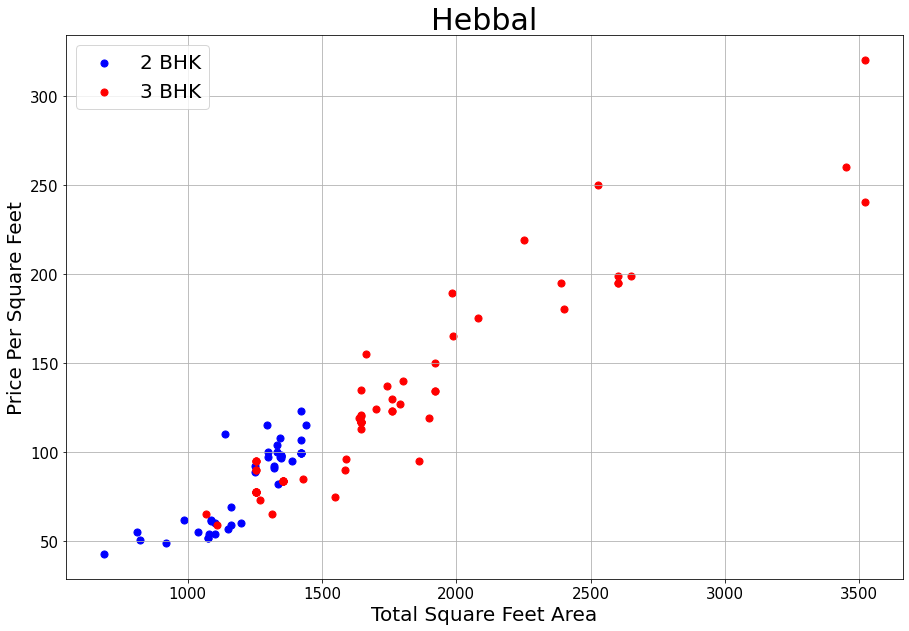

In [1042]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='b', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='r', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area', size=20)
    plt.ylabel('Price Per Square Feet', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title(location, size=30)
    plt.grid()
    plt.legend(fontsize=20)
    
plot_scatter_chart(df7, 'Hebbal')

#### Removing those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [1043]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < stats['mean']].index.values)
    return df.drop(exclude_indices, axis='index')

In [1044]:
df8 = remove_bhk_outliers(df7)
print(df7.shape)
print(df8.shape)

(10244, 7)
(7342, 7)


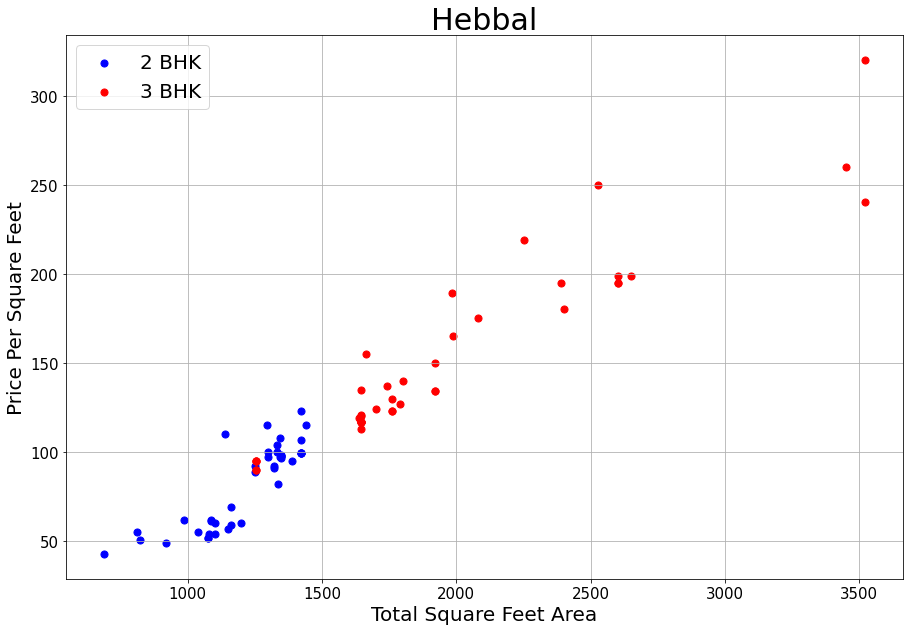

In [1045]:
plot_scatter_chart(df8, 'Hebbal')

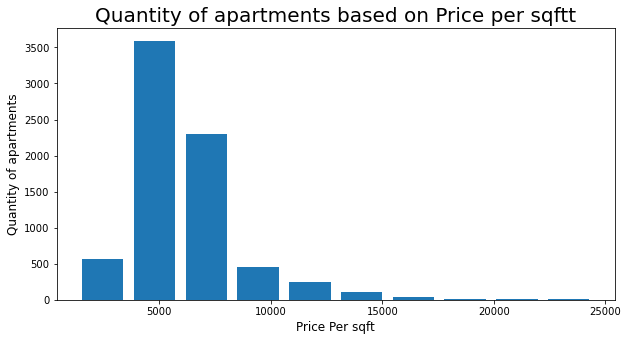

In [1046]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,5)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per sqft', size=12)
plt.ylabel('Quantity of apartments', size=12)
plt.title('Quantity of apartments based on Price per sqftt', size=20)
plt.show()

### Bathroom outlier remove
- It's normal have at most 2 bathroom more than the BHK quantity. If the apartment has more than it (for example, 10 bathroom and 7 BHK) we consider as outlier

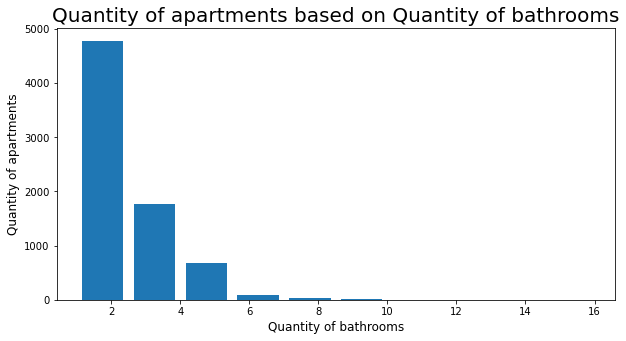

In [1047]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Quantity of bathrooms', size=12)
plt.ylabel('Quantity of apartments', size=12)
plt.title('Quantity of apartments based on Quantity of bathrooms', size=20)
plt.show()

In [1048]:
df8[df8['bath'] > df8['bhk']+2]
#we have 4 apartments with bathroom quantity outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [1049]:
df9 = df8[df8['bhk']+2 > df8['bath']]
df9.shape

(7264, 7)

### Bathroom outlier remove
- It's normal have at most 2 bathroom more than the BHK quantity. If the apartment has more than it (for example, 10 bathroom and 7 BHK) we consider as outlier

### Data Cleaning
## Sub-task 3: Delete unnecessary columns and export

In [1050]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [1051]:
df10.to_csv('dataset/Bengaluru_House_Data_Cleaned.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'dataset/Bengaluru_House_Data_Cleaned.csv'

# Task 2: Model Building

In [ ]:
df10 = pd.read_csv('dataset/Bengaluru_House_Data_Cleaned.csv')

##### Our Machine Learning Model cant read text type, so we have to create a column for the location

In [ ]:
dummies = pd.get_dummies(df10.location)
dummies

In [ ]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

In [ ]:
df12 = df11.drop('location', axis='columns')
print(df12.shape)
df12.head()

In [ ]:
X = df12.drop('price', axis='columns')
X.head()

In [ ]:
y = df12.price
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear Regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'Lasso' : {
            'model': Lasso(),
            'params': {
                'alpha' : [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X,y)

In [ ]:
def predict_price(location, sqft, size, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = size
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [ ]:
predict_price('Indira Nagar', 1000,3,3)

In [ ]:
import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [ ]:
import json
columns = {
    'data_cols' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))